In [113]:
# 
# Import Packages
#
from sklearn.metrics import recall_score, classification_report
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib as mpl

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns





import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import random
import os
import tensorflow as tf
from  tensorflow import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization

print('Packages imported.')

Packages imported.


In [114]:
#
# Read/Display images functions
#
convert = lambda category : int(category == 'calsification')

def read_images(path, use_convert):  
    X = []
    y = []
    for p in os.listdir(path):
        category = p.split(".")[0]
        if (use_convert):
            category = convert(category)
        img_array = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(64, 64))
        X.append(new_img_array)
        y.append(category)
    return (X, y)

def read_train_images(path):
    return read_images(path, True)

def read_test_images(path):
    return read_images(path, False)

def grid_display(list_of_images, list_of_titles=[], no_of_columns=2, figsize=(10,10)):
    fig = plt.figure(figsize=figsize)
    column = 0
    for i in range(len(list_of_images)):
        column += 1
        #  check for end of column and create a new figure
        if column == no_of_columns+1:
            fig = plt.figure(figsize=figsize)
            column = 1
        fig.add_subplot(1, no_of_columns, column)
        plt.imshow(list_of_images[i], cmap="gray")
        plt.axis('off')
        if len(list_of_titles) >= len(list_of_images):
            plt.title(list_of_titles[i])

In [115]:
print('Reading train image files...')
main_dir = "calsification-vs-noncalsification"
train_dir = "train"
path = os.path.join(main_dir,train_dir)
(X_train, y_train) = read_train_images(path)
print('Reading train image files done.')

Reading train image files...
Reading train image files done.


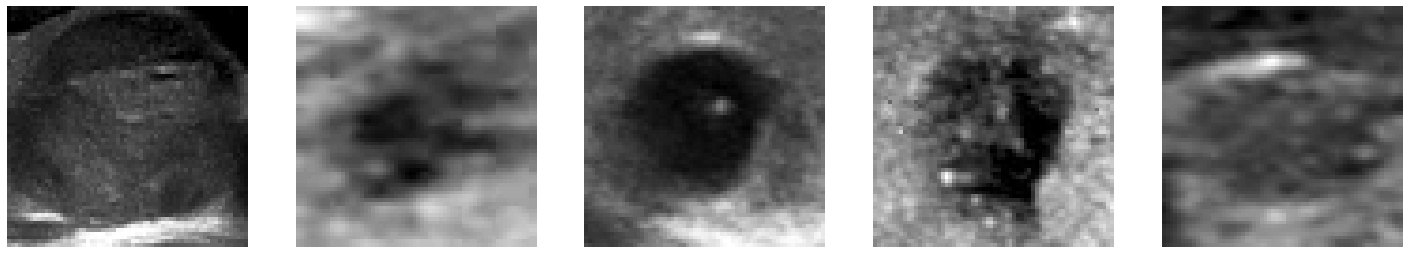

In [116]:
#
# Show some sample images
#            
random_images = []
for i in range(5):
    r = random.randint(1,len(X_train)-1)    
    random_images.append(X_train[r])    
grid_display(random_images, [], 5, (25, 25))

In [117]:
#
# Make numpy arrays and normalize image data
#
X_train = np.array(X_train).reshape(-1, 64, 64, 1)

y_train = np.array(y_train)

X_train_normalized =  X_train / 255.0

print(f'X_train {X_train_normalized.shape}')
print(f'y_train {y_train.shape}')

X_train (139, 64, 64, 1)
y_train (139,)


In [118]:
#
# Build Convolutional Neural Net 
#

model = Sequential()

input_shape = X_train_normalized.shape[1:]

# Adds a densely-connected layer with 64 units 
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another densely-connected convolution layer with 64 units 
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

# Add another densely-connected convolution layer with 64 units 
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

# Add flatten layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# Add output neruon with sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.TruePositives(name='tp'),
                       tf.keras.metrics.FalsePositives(name='fp'),
                       tf.keras.metrics.TrueNegatives(name='tn'),
                       tf.keras.metrics.FalseNegatives(name='fn'),
                       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                       tf.keras.metrics.AUC(name='auc')])

      
      

In [119]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 64)        640       
_________________________________________________________________
batch_normalization_24 (Batc (None, 62, 62, 64)        256       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
batch_normalization_25 (Batc (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 12, 12, 64)       

In [86]:
#
# Train Network 
#
epochs = 100
history=model.fit(X_train_normalized, y_train, epochs=epochs, batch_size=32, validation_split=0.2)




Train on 111 samples, validate on 28 samples
Epoch 1/100
111/111 [==============================] - 5s 43ms/sample - loss: 1.0155 - accuracy: 0.5856 - precision: 0.5844 - recall: 0.7627 - tp: 45.0000 - fp: 32.0000 - tn: 20.0000 - fn: 14.0000 - auc: 0.6618 - val_loss: 0.6576 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.8333
Epoch 2/100
111/111 [==============================] - 1s 13ms/sample - loss: 0.4631 - accuracy: 0.8288 - precision: 0.8030 - recall: 0.8983 - tp: 53.0000 - fp: 13.0000 - tn: 39.0000 - fn: 6.0000 - auc: 0.8937 - val_loss: 0.6146 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.8567
Epoch 3/100
111/111 [==============================] - 2s 14ms/sample - loss: 0.1548 - accuracy: 0.9369 - precision: 0.9483 - recall: 0.9322 - tp: 55.0000

111/111 [==============================] - 1s 12ms/sample - loss: 5.8086e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00 - tn: 52.0000 - fn: 0.0000e+00 - auc: 1.0000 - val_loss: 4.0331 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.5000
Epoch 42/100
111/111 [==============================] - 1s 12ms/sample - loss: 5.4126e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00 - tn: 52.0000 - fn: 0.0000e+00 - auc: 1.0000 - val_loss: 4.0849 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.5000
Epoch 43/100
111/111 [==============================] - 1s 12ms/sample - loss: 8.1853e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00 - tn: 52.000

Epoch 61/100
111/111 [==============================] - 1s 12ms/sample - loss: 1.1838e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00 - tn: 52.0000 - fn: 0.0000e+00 - auc: 1.0000 - val_loss: 4.9144 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.5000
Epoch 62/100
111/111 [==============================] - 1s 12ms/sample - loss: 1.2876e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00 - tn: 52.0000 - fn: 0.0000e+00 - auc: 1.0000 - val_loss: 4.9499 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.5000
Epoch 63/100
111/111 [==============================] - 1s 12ms/sample - loss: 1.4786e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00

Epoch 81/100
111/111 [==============================] - 1s 13ms/sample - loss: 1.0189e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00 - tn: 52.0000 - fn: 0.0000e+00 - auc: 1.0000 - val_loss: 5.2345 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.5000
Epoch 82/100
111/111 [==============================] - 1s 12ms/sample - loss: 8.1189e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00 - tn: 52.0000 - fn: 0.0000e+00 - auc: 1.0000 - val_loss: 5.2387 - val_accuracy: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 19.0000 - val_fn: 9.0000 - val_auc: 0.5000
Epoch 83/100
111/111 [==============================] - 2s 14ms/sample - loss: 1.2124e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - tp: 59.0000 - fp: 0.0000e+00

In [120]:
##results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
##print("Loss: {:0.4f}".format(results[0]))

results = model.evaluate(X_train_normalized, y_train, batch_size=32, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6930


In [121]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [122]:
# Use a log scale to show the wide range of values.
def plot_loss(history, label, n):
    plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

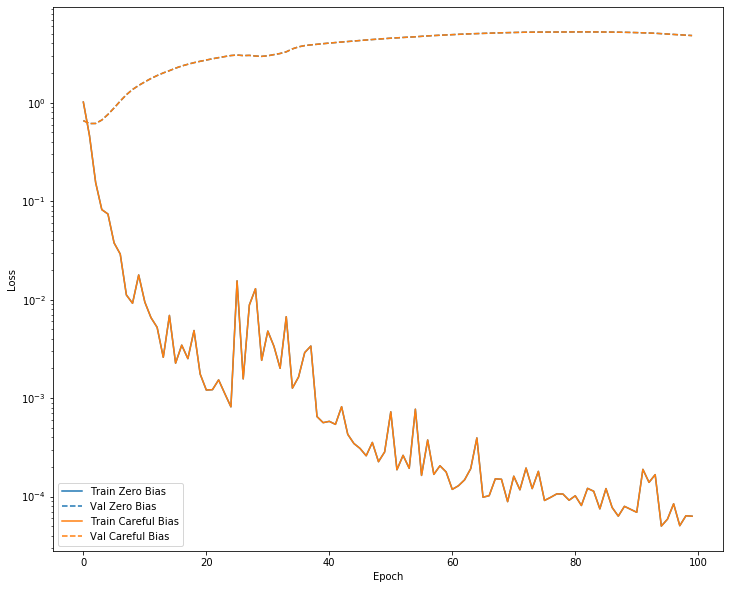

In [123]:
plot_loss(history, "Zero Bias", 0)
plot_loss(history, "Careful Bias", 1)

In [124]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

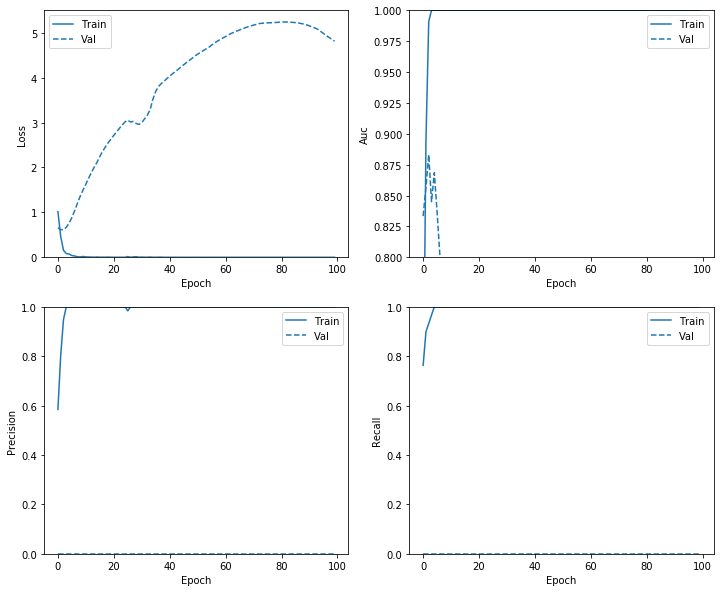

In [92]:
plot_metrics(history)

In [125]:
train_predictions_baseline = model.predict(X_train_normalized, batch_size=32)
### test code down

In [126]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,20])
    plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

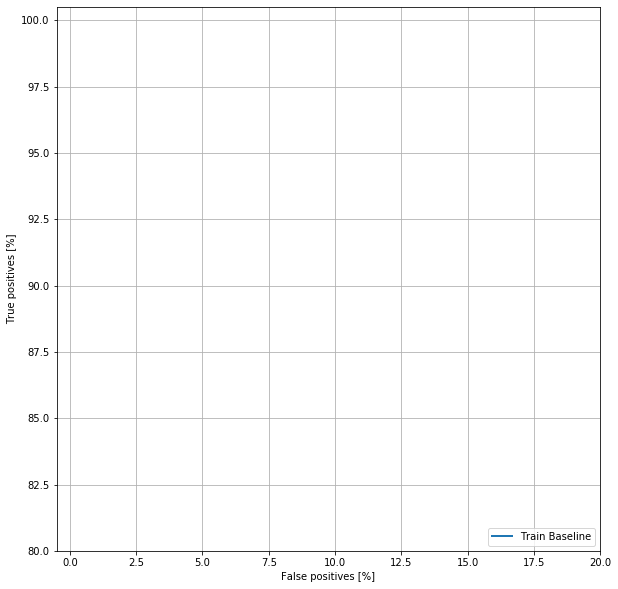

In [127]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plt.legend(loc='lower right')

In [128]:

train_predictions_baseline = model.predict(X_train_normalized, batch_size=32)

In [129]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.6930053439929331
accuracy :  0.48920864
precision :  0.4890511
recall :  0.9852941
tp :  67.0
fp :  70.0
tn :  1.0
fn :  1.0
auc :  0.5144988

Legitimate Transactions Detected (True Negatives):  1
Legitimate Transactions Incorrectly Detected (False Positives):  70
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  67
Total Fraudulent Transactions:  68


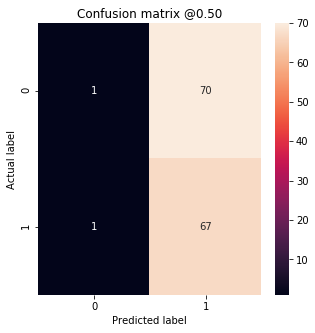

In [130]:
baseline_results = model.evaluate(X_train_normalized, y_train,
                                  batch_size=32, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_train, train_predictions_baseline)

In [ ]:
### me other code

In [ ]:
#checking internet code


In [131]:
# 
# Predict
#
main_dir = "calsification-vs-noncalsification"
test_dir = "test"
test_path = os.path.join(main_dir,test_dir)
print('reading Test images...')
(X_test, y_test) = read_test_images(test_path)

X_test = np.array(X_test).reshape(-1, 64, 64, 1)
y_test = np.array(y_test)
X_test_normalized =  X_test / 255.0
print('Reading test images done')

reading Test images...
Reading test images done


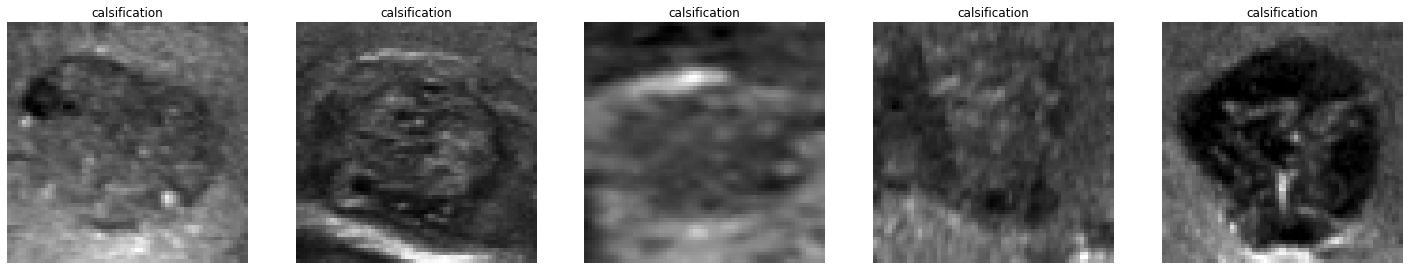

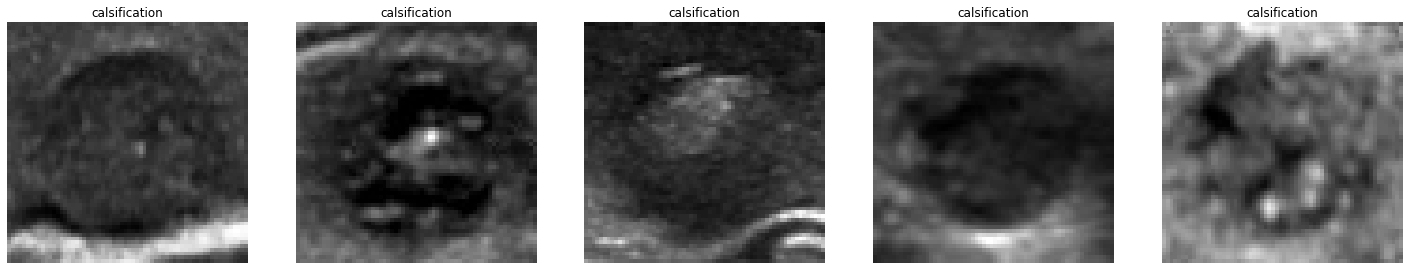

In [132]:
#
# Show some sample predictions
#
random_images = []
random_titles = []
for i in range(10):
    r = random.randint(1, len(X_test)-1)    
    random_images.append(X_test[r].reshape(64, 64))    
    pred =  model.predict(X_test_normalized[r].reshape(1, 64, 64, 1))
    if pred >= 0.5:        
        random_titles.append('calsification')
    else:        
        random_titles.append('non_calsification')
        
grid_display(random_images, random_titles, 5, (25, 25))


In [133]:
#
# Submission
#

predictions = model.predict(X_test_normalized)
predicted_val = [int(round(p[0])) for p in predictions]
submission_df = pd.DataFrame({'id':y_test, 'label':predicted_val})



# write data frame wot csv
submission_df.to_csv("submission.csv", index=False)



In [134]:
test_predictions_baseline = model.predict(X_test_normalized, batch_size=32)

In [135]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

In [136]:
print(y_train)

[0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0
 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1
 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0]


In [137]:
print(y_test)

['09161397701-5' '28451-09161537402-8' 'J09161558202-5'
 '94075-09161525302-13' '79621-09161537402-3' '27414-09161544901-13'
 '50754-09161519702-9' '09161461101-17' '77550-09161556001-2'
 '55506-09161525302-29' 'L09161383402-6' '09161444602-4'
 '92790-09161526101-13' '49604-09161519702-7' '09161461502-5'
 '11680-09161555901-4' '77173-09161525302-15' 'J09161397502-9'
 '93507-09161537502-5' '09161489701-29' '09161544902-18' 'J09161383402-6'
 'boornavayi_mohsen' '09161435202-16' '39575-09161516001-15'
 '60254-09161521201-18' '09161521201-3' '13624-09161556001-10'
 '33576-09161525302-11' '09161372501-2' 'L09161444602-10'
 '48279-09161555901-12' '09161366802-2' '12851-09161521201-25'
 'J09161444602-10' '58244-09161536702-8' '14964-09161553601-5'
 '09161566502-34' '09161523601-7' '09161397701-2' '15056-09161555202-15'
 '89989-09161531902-5' '35213-09161521201-15' '29362-09161517801-7'
 'a_th_itis_gholizadeh_2' '24361-09161525302-20' '95266-09161519702-4'
 'amiri_parvin' 'L09161558202-13' '09

In [138]:
baseline_results2 = model.evaluate(X_test_normalized, y_test,
                                  batch_size=32, verbose=0)
for name, value in zip(model.metrics_names, baseline_results2):
    print(name, ': ', value)
print()
plot_cm(y_test, test_predictions_baseline)


UnimplementedError:  Cast string to float is not supported
	 [[node loss/dense_17_loss/Cast (defined at <ipython-input-138-f76c79d780e8>:2) ]] [Op:__inference_distributed_function_40278]

Function call stack:
distributed_function


In [139]:
#
# Save and Load model
#
from keras.models import load_model

model_json = model.to_json()
with open("calsification_noncalsification_model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("calsification_noncalsification_model.h5")

In [140]:
#
# Evaluate model with an image from internet
#
from tensorflow.keras.models import load_model, model_from_json
from tensorflow.keras.utils import CustomObjectScope
from tensorflow.keras.initializers import glorot_uniform

#print(os.listdir("../input"))

with open('calsification_noncalsification_model.json', 'r') as f:
    loaded_model = model_from_json(f.read(), custom_objects={'GlorotUniform': glorot_uniform() })   
loaded_model.load_weights('calsification_noncalsification_model.h5')
    
print('model loaded')
loaded_model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

model loaded


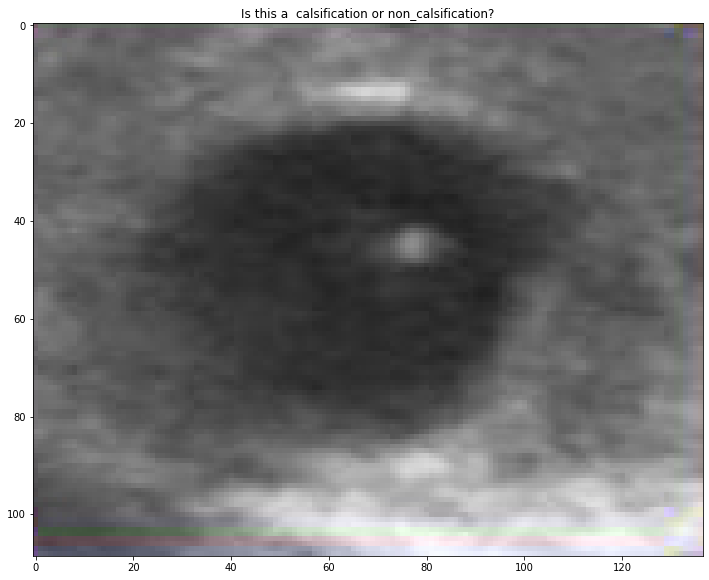

calsification 50.82435607910156%


In [141]:
import cv2
from PIL import Image
import requests
from io import BytesIO

url='http://mirror.iranserver.com/ai/09161420701_7.jpg'
##url ="/home/reza/Music/thesis/cnn_tyroid/cnn/cllasification images kaggel/calsification-vs-noncalsification/test/29222-09161531902-11.jpg"
#url = 'https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/13002253/GettyImages-521536928-_1_.jpg'
#url = 'https://www.humanesociety.org/sites/default/files/styles/400x400/public/2018/06/cat-217679.jpg?h=c4ed616d&itok=H0FcH69a'
#url='https://upload.wikimedia.org/wikipedia/commons/9/96/Himalayan_CAT.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

plt.imshow(img)
plt.title('Is this a  calsification or non_calsification?')
plt.show()
open_cv_image = np.array(img) 
open_cv_gray_image = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
open_cv_gray_image = cv2.resize(open_cv_gray_image, dsize=(64, 64)) 
open_cv_gray_image_scaled = open_cv_gray_image / 255.0

pred = loaded_model.predict(open_cv_gray_image_scaled.reshape(1, 64, 64, 1))[0][0]
if (pred > 0.5):
    print(f'calsification {pred * 100}%')
else:
    print(f'non_calsification {(1-pred)*100}%')
    



## Evaluate metrics

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)